In [6]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np

In [7]:
import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

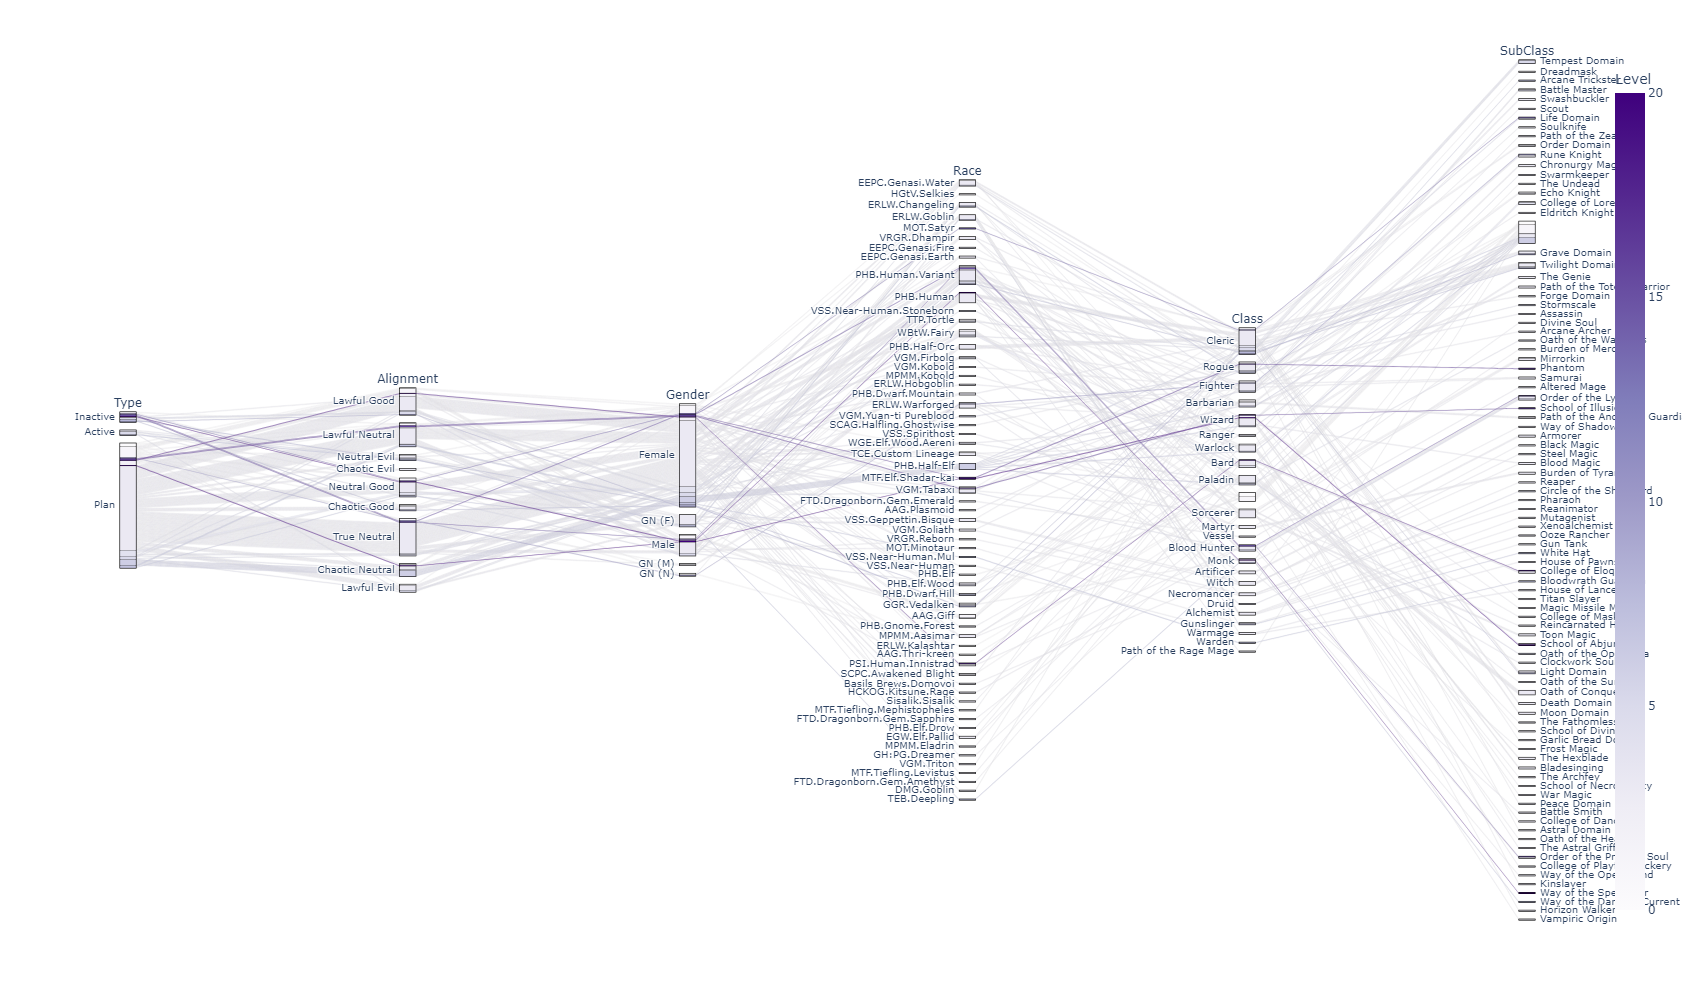

In [11]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)      

def Cla_Spilt(cs0):
    cs1 = cs0.split(":")
    cs2 = cs1[0].split(".")
    
    S1=""
    S2=""
    S3=0
    
    try:
      S1 = cs2[1].strip()
    except:
      S1 = ""
    
    try:
      S2 = cs2[2].strip()
    except:
      S2 = ""
    
    try:
      S3 = int(cs1[1].strip())
    except:
      S3 = 0
    
    return [S1,S2,S3]
    

Table_Character = pd.read_csv('/home/jovyan/Data/Characters.csv')
Col = ['ID','Name','Type','Alignment','Gender','Race','Class','SubClass','Level']
Col2 = ['ID','Name','Type','Alignment','Gender','Race','Class Breakdown']

Data = []
for x1, y1 in Table_Character.iterrows():
    Ro = [y1['ID'],y1['Name'],y1['Type'],y1['Alignment'],y1['Gender'],y1['Race']]
    CB = y1['Class Breakdown']
    if "," in CB:
        x = CB.split(",")
        for y in x:
            st = Cla_Spilt(y)
            arr1 = Ro.copy()
            arr3 = np.concatenate((arr2, st))
            Data.append(arr3)
    else:
        arr2 = Ro.copy()
        st = Cla_Spilt(CB)
        arr3 = np.concatenate((arr2, st))
        Data.append(arr3)

Data.insert(0, Col)
df = pd.DataFrame(Data)      
df.columns = df.iloc[0]
df = df[1:]

df.to_csv('/home/jovyan/Data/Para_Class.csv', index=False) #<<<<<<<
PCT = pd.read_csv('/home/jovyan/Data/Para_Class.csv')

#dimensions=['ID','Name','Type','Alignment','Gender','Race','Class','SubClass', 'Level']
fig = px.parallel_categories(PCT,
                             dimensions=['Type','Alignment','Gender','Race','Class','SubClass'],
                             color="Level", color_continuous_scale=px.colors.sequential.Purples)
fig.update_layout(height=1000)
fig.show()

In [12]:
PCT

ID                     Name      Type       Alignment  Gender  \
0      1.0            Talia Winters  Inactive     Lawful Good  Female   
1      2.0              Sylla Salvo  Inactive  Lawful Neutral  Female   
2      3.0                 JD (Jin)    Active    Neutral Evil  GN (F)   
3      3.0                 JD (Jin)    Active    Neutral Evil  GN (F)   
4      3.0                 JD (Jin)    Active    Neutral Evil  GN (F)   
..     ...                      ...       ...             ...     ...   
161  136.0        Tall 'Kelp' Green      Plan    Neutral Good  GN (F)   
162  137.0               Esina Kadu      Plan    Neutral Good  GN (F)   
163  138.0  Ozen Agethea Rootwalker    Active    Neutral Good  GN (F)   
164  139.0          Kenna McCormick  Inactive    Neutral Good  GN (N)   
165  140.0                     Nora      Plan    True Neutral  Female   

                  Race      Class                        SubClass  Level  
0    EEPC.Genasi.Water     Cleric                  Tempest Domain      5  
1         HGtV.Selkies      Rogue                       Dreadmask      1  
2      ERLW.Changeling      Rogue                Arcane Trickster      7  
3      ERLW.Changeling    Fighter                   Battle Master      5  
4      ERLW.Changeling      Rogue                    Swashbuckler      3  
..                 ...        ...                             ...    ...  
161       TEB.Deepling       Monk      Way of the Dancing Current      7  
162       PHB.Elf.Wood     Ranger                  Horizon Walker      3  
163        VGM.Goliath  Barbarian  Path of the Ancestral Guardian      3  
164  PHB.Human.Variant     Cleric                    Order Domain      1  
165       VRGR.Dhampir   Sorcerer                 Vampiric Origin      3  

[166 rows x 9 columns]

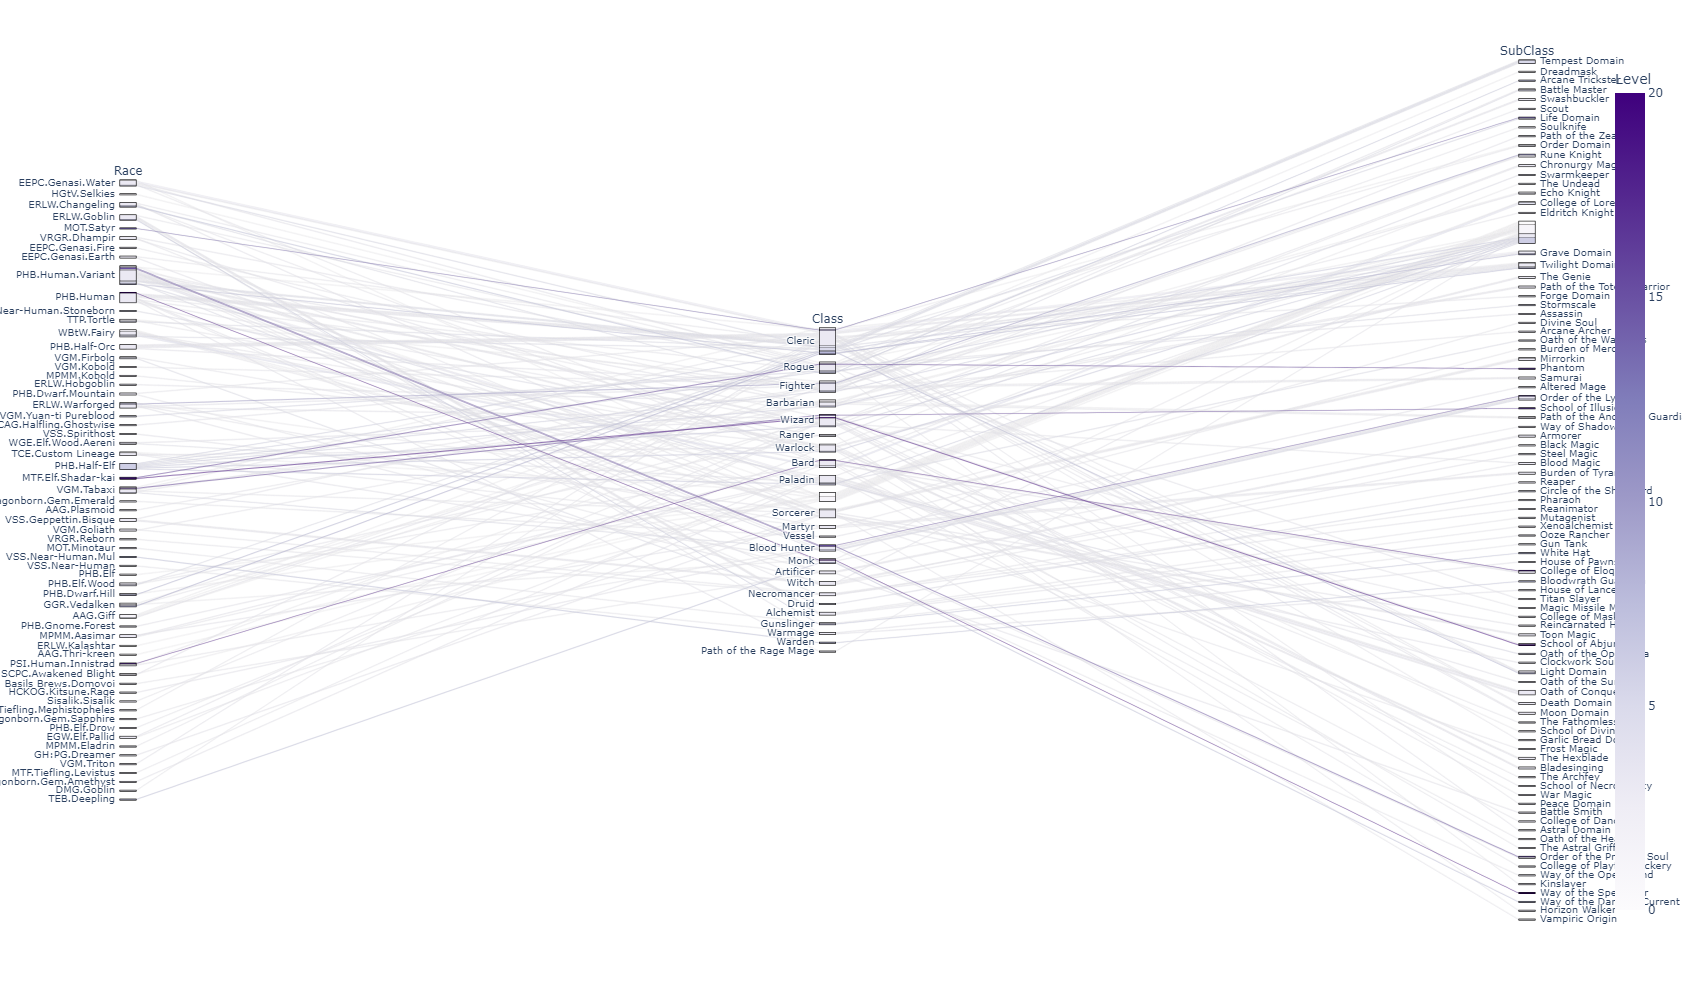

In [13]:
fig1 = px.parallel_categories(PCT,
                             dimensions=['Race','Class','SubClass'],
                             color="Level", color_continuous_scale=px.colors.sequential.Purples)
fig1.update_layout(height=1000)
fig1.show()